In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'leafs_names/train'
data_test_path = 'leafs_names/test'
data_val_path = 'leafs_names/validation'

In [3]:
img_width = 256
img_height = 256

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 5800 files belonging to 38 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['Amla',
 'Amruta_Balli',
 'Arali',
 'Ashoka',
 'Ashwagandha',
 'Avacado',
 'Bamboo',
 'Basale',
 'Betel',
 'Betel_Nut',
 'Brahmi',
 'Castor',
 'Curry_Leaf',
 'Doddapatre',
 'Ekka',
 'Ganike',
 'Geranium',
 'Henna',
 'Hibiscus',
 'Honge',
 'Insulin',
 'Jasmine',
 'Lemon',
 'Lemon_grass',
 'Mango',
 'Mint',
 'Nagadali',
 'Neem',
 'Nithyapushpa',
 'Nooni',
 'Pappaya',
 'Pepper',
 'Pomegranate',
 'Raktachandini',
 'Rose',
 'Sapota',
 'Tulasi',
 'Wood_sorel']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle = False,
    validation_split=False)

Found 583 files belonging to 38 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    shuffle = False,
    batch_size=32,
    validation_split=False)

Found 583 files belonging to 38 classes.


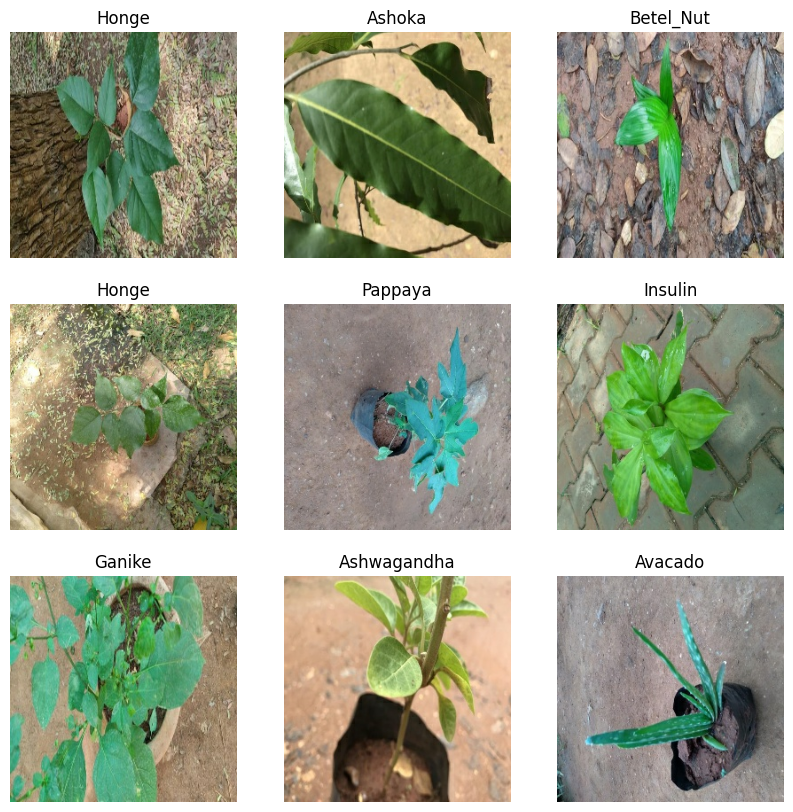

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat))
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [15]:
epochs_size = 25  # or any other value you want to use

history = model.fit(data_train, validation_data=data_val, epochs=epochs_size, batch_size=32,verbose=1)


Epoch 1/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 56s 290ms/step - accuracy: 0.0599 - loss: 3.6558 - val_accuracy: 0.2796 - val_loss: 2.5560
Epoch 2/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 54s 297ms/step - accuracy: 0.3149 - loss: 2.4674 - val_accuracy: 0.5386 - val_loss: 1.5568
Epoch 3/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 54s 298ms/step - accuracy: 0.5849 - loss: 1.3835 - val_accuracy: 0.7684 - val_loss: 0.8347
Epoch 4/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 54s 295ms/step - accuracy: 0.7851 - loss: 0.7408 - val_accuracy: 0.7873 - val_loss: 0.6025
Epoch 5/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 56s 308ms/step - accuracy: 0.9061 - loss: 0.3308 - val_accuracy: 0.9383 - val_loss: 0.2184
Epoch 6/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 61s 335ms/step - accuracy: 0.9350 - loss: 0.2271 - val_accuracy: 0.9880 - val_loss: 0.0998
Epoch 7/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 55s 301ms/step - accuracy: 0.9669 - loss: 0.1272 - val_accuracy: 0.9794 - val_loss: 0.0671
Epoch 8/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 55s 301ms/step - accuracy: 0.9680 - loss: 0

In [16]:
# Now call the summary after building the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,251,668 (96.33 MB)

 Trainable params: 8,417,222 (32.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,834,446 (64.22 MB)

Text(0.5, 1.0, 'loss')

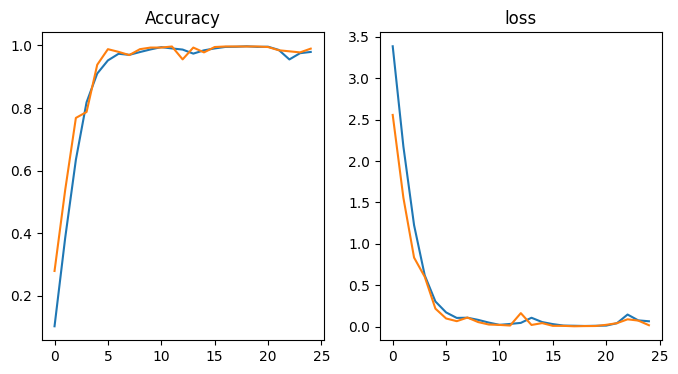

In [33]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('loss')

In [34]:
model.save('Image_Classify.keras')

In [50]:
image='tulasi.jpg'
image=tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr= tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [51]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [52]:
score=tf.nn.softmax(predict)

In [53]:
print('leaf_image in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

leaf_image in image is Tulasi with accuracy of 99.59


In [54]:
model.save('Image_classify.keras')